In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Census

In [2]:
full = Table.read_table('nc-est2015-agesex-res.csv')
full

SEX  | AGE  | CENSUS2010POP | ESTIMATESBASE2010 | POPESTIMATE2010 | POPESTIMATE2011 | POPESTIMATE2012 | POPESTIMATE2013 | POPESTIMATE2014 | POPESTIMATE2015
0    | 0    | 3944153       | 3944160           | 3951330         | 3963087         | 3926540         | 3931141         | 3949775         | 3978038
0    | 1    | 3978070       | 3978090           | 3957888         | 3966551         | 3977939         | 3942872         | 3949776         | 3968564
0    | 2    | 4096929       | 4096939           | 4090862         | 3971565         | 3980095         | 3992720         | 3959664         | 3966583
0    | 3    | 4119040       | 4119051           | 4111920         | 4102470         | 3983157         | 3992734         | 4007079         | 3974061
0    | 4    | 4063170       | 4063186           | 4077551         | 4122294         | 4112849         | 3994449         | 4005716         | 4020035
0    | 5    | 4056858       | 4056872           | 4064653         | 4087709         | 4132242         | 4123626         | 4006900         | 4018158
0    | 6    | 4066381       | 4066412           | 4073013         | 4074993         | 4097605         | 4142916         | 4135930         | 4019207
0    | 7    | 4030579       | 4030594           | 4043046         | 4083225         | 4084913         | 4108349         | 4155326         | 4148360
0    | 8    | 4046486       | 4046497           | 4025604         | 4053203         | 4093177         | 4095711         | 4120903         | 4167887
0    | 9    | 4148353       | 4148369           | 4125415         | 4035710         | 4063152         | 4104072         | 4108349         | 4133564
... (296 rows omitted)

In [3]:
full.where(1, 0)

SEX  | AGE  | CENSUS2010POP | ESTIMATESBASE2010 | POPESTIMATE2010 | POPESTIMATE2011 | POPESTIMATE2012 | POPESTIMATE2013 | POPESTIMATE2014 | POPESTIMATE2015
0    | 0    | 3944153       | 3944160           | 3951330         | 3963087         | 3926540         | 3931141         | 3949775         | 3978038
1    | 0    | 2014276       | 2014278           | 2018420         | 2028427         | 2007717         | 2009528         | 2020326         | 2035134
2    | 0    | 1929877       | 1929882           | 1932910         | 1934660         | 1918823         | 1921613         | 1929449         | 1942904

In [4]:
partial = full.select(['SEX', 'AGE', 4, 9])
partial

SEX  | AGE  | POPESTIMATE2010 | POPESTIMATE2015
0    | 0    | 3951330         | 3978038
0    | 1    | 3957888         | 3968564
0    | 2    | 4090862         | 3966583
0    | 3    | 4111920         | 3974061
0    | 4    | 4077551         | 4020035
0    | 5    | 4064653         | 4018158
0    | 6    | 4073013         | 4019207
0    | 7    | 4043046         | 4148360
0    | 8    | 4025604         | 4167887
0    | 9    | 4125415         | 4133564
... (296 rows omitted)

In [5]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled(3, '2015')
simple

SEX  | AGE  | 2010    | 2015
0    | 0    | 3951330 | 3978038
0    | 1    | 3957888 | 3968564
0    | 2    | 4090862 | 3966583
0    | 3    | 4111920 | 3974061
0    | 4    | 4077551 | 4020035
0    | 5    | 4064653 | 4018158
0    | 6    | 4073013 | 4019207
0    | 7    | 4043046 | 4148360
0    | 8    | 4025604 | 4167887
0    | 9    | 4125415 | 4133564
... (296 rows omitted)

In [6]:
partial.column("AGE")

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  7

What does AGE 999 mean?

In [7]:
partial.where('AGE', 999)

SEX  | AGE  | POPESTIMATE2010 | POPESTIMATE2015
0    | 999  | 309346863       | 321418820
1    | 999  | 152088043       | 158229297
2    | 999  | 157258820       | 163189523

Which age groups have populations that are changing fastest?

In [8]:
census = simple.with_columns(
        'Change', simple.column('2015') - simple.column('2010'), 
        'Growth', (simple.column('2015') / simple.column('2010')) ** (1/5) - 1)
census

SEX  | AGE  | 2010    | 2015    | Change  | Growth
0    | 0    | 3951330 | 3978038 | 26708   | 0.00134821
0    | 1    | 3957888 | 3968564 | 10676   | 0.000538899
0    | 2    | 4090862 | 3966583 | -124279 | -0.00615114
0    | 3    | 4111920 | 3974061 | -137859 | -0.00679711
0    | 4    | 4077551 | 4020035 | -57516  | -0.00283716
0    | 5    | 4064653 | 4018158 | -46495  | -0.00229831
0    | 6    | 4073013 | 4019207 | -53806  | -0.00265615
0    | 7    | 4043046 | 4148360 | 105314  | 0.00515619
0    | 8    | 4025604 | 4167887 | 142283  | 0.00697103
0    | 9    | 4125415 | 4133564 | 8149    | 0.000394752
... (296 rows omitted)

In [9]:
census.set_format('Growth', PercentFormatter)
census.set_format([2, 3, 4], NumberFormatter)

SEX  | AGE  | 2010      | 2015      | Change   | Growth
0    | 0    | 3,951,330 | 3,978,038 | 26,708   | 0.13%
0    | 1    | 3,957,888 | 3,968,564 | 10,676   | 0.05%
0    | 2    | 4,090,862 | 3,966,583 | -124,279 | -0.62%
0    | 3    | 4,111,920 | 3,974,061 | -137,859 | -0.68%
0    | 4    | 4,077,551 | 4,020,035 | -57,516  | -0.28%
0    | 5    | 4,064,653 | 4,018,158 | -46,495  | -0.23%
0    | 6    | 4,073,013 | 4,019,207 | -53,806  | -0.27%
0    | 7    | 4,043,046 | 4,148,360 | 105,314  | 0.52%
0    | 8    | 4,025,604 | 4,167,887 | 142,283  | 0.70%
0    | 9    | 4,125,415 | 4,133,564 | 8,149    | 0.04%
... (296 rows omitted)

In [10]:
# make a table of the US population by age
by_age = census.where('SEX', 0).drop('SEX').where('AGE', are.below(999))
by_age

AGE  | 2010      | 2015      | Change   | Growth
0    | 3,951,330 | 3,978,038 | 26,708   | 0.13%
1    | 3,957,888 | 3,968,564 | 10,676   | 0.05%
2    | 4,090,862 | 3,966,583 | -124,279 | -0.62%
3    | 4,111,920 | 3,974,061 | -137,859 | -0.68%
4    | 4,077,551 | 4,020,035 | -57,516  | -0.28%
5    | 4,064,653 | 4,018,158 | -46,495  | -0.23%
6    | 4,073,013 | 4,019,207 | -53,806  | -0.27%
7    | 4,043,046 | 4,148,360 | 105,314  | 0.52%
8    | 4,025,604 | 4,167,887 | 142,283  | 0.70%
9    | 4,125,415 | 4,133,564 | 8,149    | 0.04%
... (91 rows omitted)

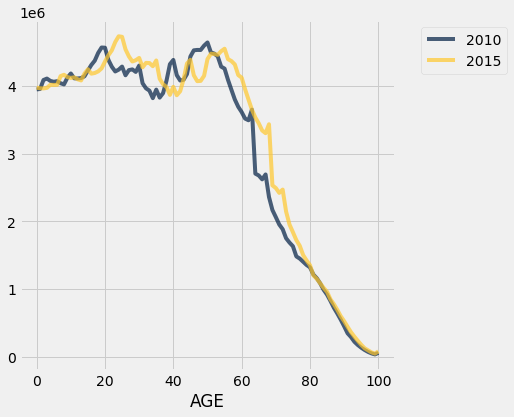

In [11]:
by_age.select("AGE","2010","2015").plot("AGE")

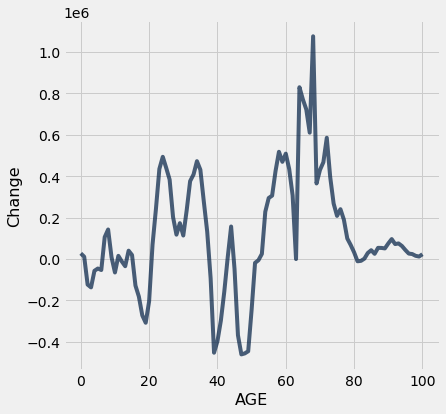

In [12]:
by_age.select("AGE","Change").plot("AGE")

In [13]:
by_age.sort("Change", descending=True)

AGE  | 2010      | 2015      | Change    | Growth
68   | 2,359,816 | 3,436,357 | 1,076,541 | 7.81%
64   | 2,706,055 | 3,536,156 | 830,101   | 5.50%
65   | 2,678,525 | 3,450,043 | 771,518   | 5.19%
66   | 2,621,335 | 3,344,134 | 722,799   | 4.99%
67   | 2,693,707 | 3,304,187 | 610,480   | 4.17%
72   | 1,883,820 | 2,469,605 | 585,785   | 5.56%
58   | 3,802,447 | 4,320,522 | 518,075   | 2.59%
60   | 3,616,721 | 4,125,792 | 509,071   | 2.67%
24   | 4,243,602 | 4,737,345 | 493,743   | 2.23%
34   | 3,822,189 | 4,294,838 | 472,649   | 2.36%
... (91 rows omitted)

In [14]:
2010-68 # Bombing of Pearl Harbor was 12/7/1941

1942

In [15]:
2015-68 # Bombing of Nagasaki was 8/9/1945

1947

## Movies

In [16]:
actors = Table.read_table('actors.csv')
actors

Actor              | Total Gross | Number of Movies | Average per Movie | #1 Movie                     | Gross
Harrison Ford      | 4871.7      | 41               | 118.8             | Star Wars: The Force Awakens | 936.7
Samuel L. Jackson  | 4772.8      | 69               | 69.2              | The Avengers                 | 623.4
Morgan Freeman     | 4468.3      | 61               | 73.3              | The Dark Knight              | 534.9
Tom Hanks          | 4340.8      | 44               | 98.7              | Toy Story 3                  | 415
Robert Downey, Jr. | 3947.3      | 53               | 74.5              | The Avengers                 | 623.4
Eddie Murphy       | 3810.4      | 38               | 100.3             | Shrek 2                      | 441.2
Tom Cruise         | 3587.2      | 36               | 99.6              | War of the Worlds            | 234.3
Johnny Depp        | 3368.6      | 45               | 74.9              | Dead Man's Chest             | 423.3
Michael Caine      | 3351.5      | 58               | 57.8              | The Dark Knight              | 534.9
Scarlett Johansson | 3341.2      | 37               | 90.3              | The Avengers                 | 623.4
... (40 rows omitted)

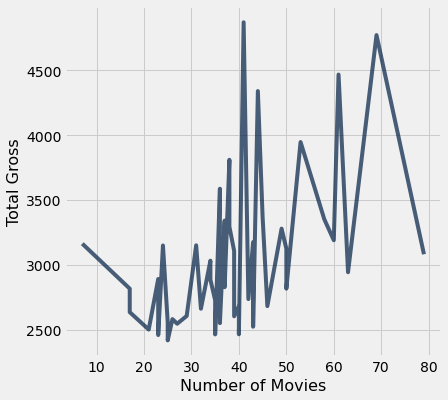

In [17]:
actors.plot('Number of Movies', "Total Gross")

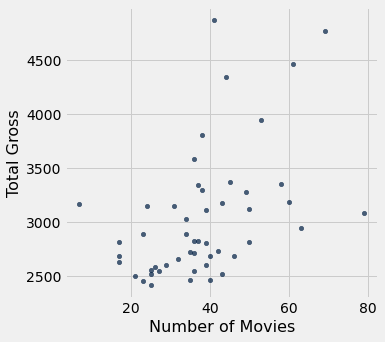

In [18]:
actors.scatter('Number of Movies', 'Total Gross')

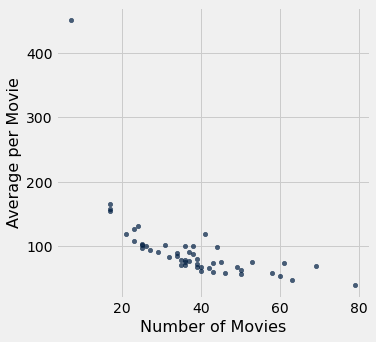

In [19]:
actors.scatter('Number of Movies', 'Average per Movie')

Let's find the outlier: which actor appears in <10 movies?

In [20]:
actors.where('Number of Movies', are.below(10))

Actor           | Total Gross | Number of Movies | Average per Movie | #1 Movie                     | Gross
Anthony Daniels | 3162.9      | 7                | 451.8             | Star Wars: The Force Awakens | 936.7

Now let's remove the outlier from the table, and make a scatter plot of the other actors

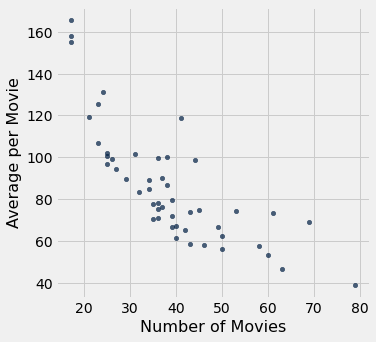

In [21]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

In [22]:
actors.where('Number of Movies', are.above(50))

Actor              | Total Gross | Number of Movies | Average per Movie | #1 Movie           | Gross
Samuel L. Jackson  | 4772.8      | 69               | 69.2              | The Avengers       | 623.4
Morgan Freeman     | 4468.3      | 61               | 73.3              | The Dark Knight    | 534.9
Robert Downey, Jr. | 3947.3      | 53               | 74.5              | The Avengers       | 623.4
Michael Caine      | 3351.5      | 58               | 57.8              | The Dark Knight    | 534.9
Bruce Willis       | 3189.4      | 60               | 53.2              | Sixth Sense        | 293.5
Robert DeNiro      | 3081.3      | 79               | 39                | Meet the Fockers   | 279.3
Liam Neeson        | 2942.7      | 63               | 46.7              | The Phantom Menace | 474.5

In [23]:
movies = Table.read_table('movies_by_year.csv')
movies

Year | Total Gross | Number of Movies | #1 Movie
2015 | 11128.5     | 702              | Star Wars: The Force Awakens
2014 | 10360.8     | 702              | American Sniper
2013 | 10923.6     | 688              | Catching Fire
2012 | 10837.4     | 667              | The Avengers
2011 | 10174.3     | 602              | Harry Potter / Deathly Hallows (P2)
2010 | 10565.6     | 536              | Toy Story 3
2009 | 10595.5     | 521              | Avatar
2008 | 9630.7      | 608              | The Dark Knight
2007 | 9663.8      | 631              | Spider-Man 3
2006 | 9209.5      | 608              | Dead Man's Chest
... (26 rows omitted)

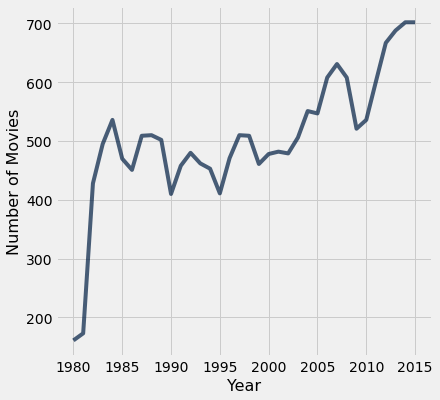

In [24]:
movies.plot('Year', 'Number of Movies')

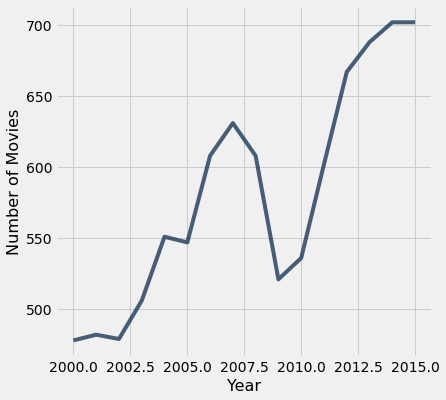

In [25]:
century_21 = movies.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')

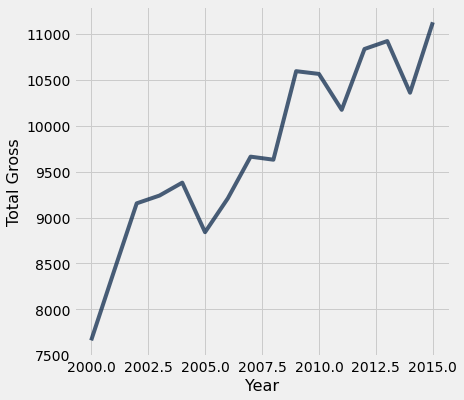

In [26]:
century_21.plot('Year', 'Total Gross')

In [27]:
top = Table.read_table('top_movies_2020.csv')
top.set_format([1, 2], NumberFormatter)
top

Title                       | Gross (Adjusted) | Gross       | Studio          | Est. Num Tickets | Year
2001: A Space Odyssey       | 409,683,573      | 60,405,931  | MGM             | 43,722,900       | 1968
Airport                     | 619,462,881      | 100,489,151 | Universal       | 66,111,300       | 1970
Aladdin                     | 491,384,351      | 217,350,219 | Disney          | 52,442,300       | 1992
Alice in Wonderland         | 394,495,740      | 334,191,110 | Disney          | 42,102,000       | 2010
American Graffiti           | 615,742,991      | 115,000,000 | Universal       | 65,714,300       | 1973
American Sniper             | 403,659,600      | 350,126,372 | Warner Brothers | 43,080,000       | 2014
An Officer and a Gentleman  | 409,065,153      | 129,795,554 | Paramount       | 43,656,900       | 1982
Apollo 13                   | 373,466,649      | 173,837,933 | Universal       | 39,857,700       | 1995
Armageddon                  | 402,726,348      | 201,578,182 | Disney          | 42,980,400       | 1998
Around the World in 80 Days | 605,446,298      | 42,000,000  | United Artists  | 64,615,400       | 1956
... (190 rows omitted)

What are the top 10 movies by gross? Make a bar chart.

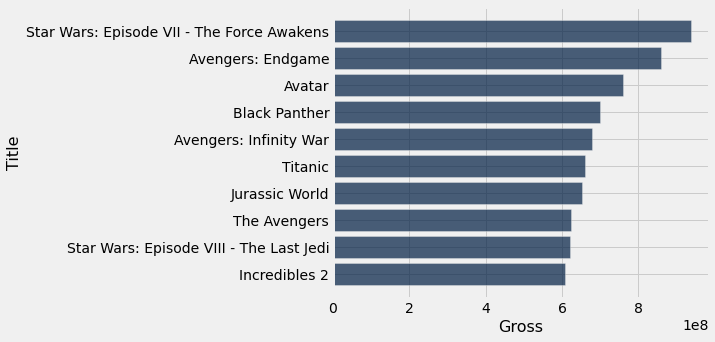

In [28]:
top10 = top.sort("Gross", descending=True).take(np.arange(10))
top10.barh("Title", "Gross")

How large is the adjusted gross of the top 10 movies by Gross? Make a bar chart.

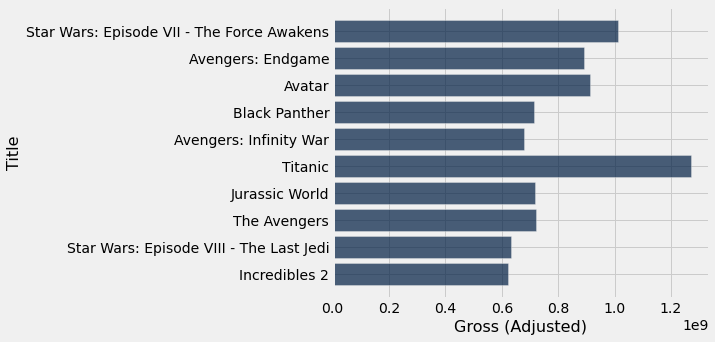

In [29]:
top10.barh("Title", "Gross (Adjusted)")

What are the top 10 movies by adjusted gross? Make a bar chart.

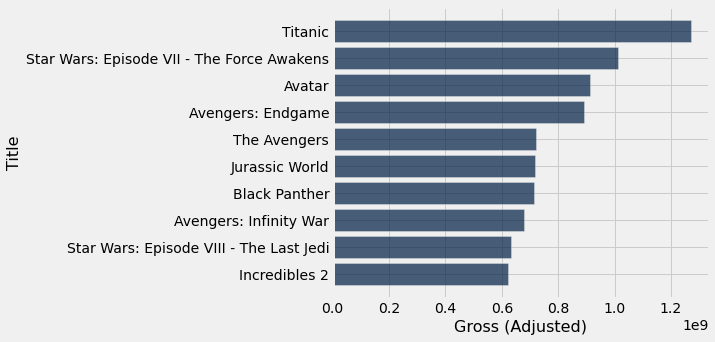

In [30]:
top10.sort("Gross (Adjusted)", descending=True)\
    .barh("Title", "Gross (Adjusted)")

We can also plot a bar chart of every column in a table by naming which column to plot by. This works for tables of two or more columns, and creates stacked bar charts.

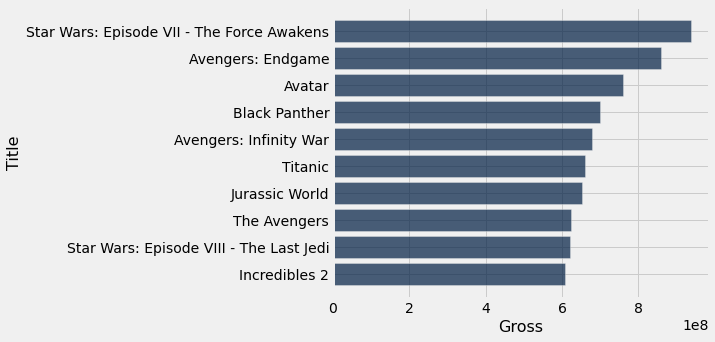

In [31]:
top10.select('Title', 'Gross').barh('Title')

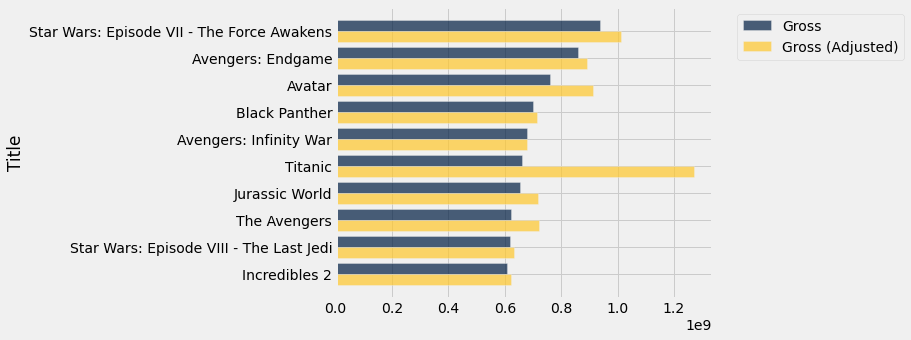

In [32]:
top10.select('Title', 'Gross', 'Gross (Adjusted)').barh('Title')

## Categorical Distributions

We can use the `group` method to answer the question: How many movies did each studio make?

In [33]:
studios = top.group('Studio')
studios

Studio     | count
AVCO       | 1
Columbia   | 9
Disney     | 54
Dreamworks | 4
Fox        | 23
IFC        | 1
Lionsgate  | 3
MGM        | 7
Metro      | 1
NM         | 1
... (10 rows omitted)

Make a bar chart to show which studios made the most movies.

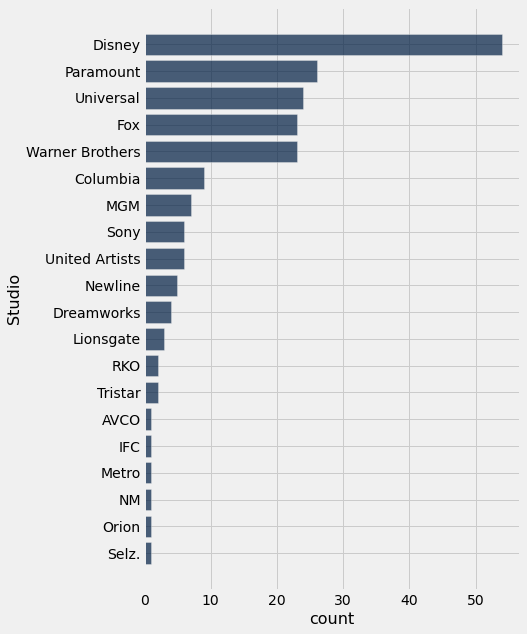

In [34]:
studios.sort('count', descending=True).barh('Studio')

Similarly, can count the number of registered undergraduate students in DSFA by college.

In [35]:
reg = Table.read_table("reg.csv")
reg

STUDENT PROGRAM                | STUDENT PLAN
Arts and Sciences              | Undeclared
Architecture, Art and Planning | Urban & Regional Studies
Business                       | Hotel and Restaurant Admin
Arts and Sciences              | Government, History
Arts and Sciences              | Computer Science
Agriculture and Life Sciences  | Development Sociology
Architecture, Art and Planning | Urban & Regional Studies
Arts and Sciences              | Economics
Arts and Sciences              | Undeclared
Arts and Sciences              | Undeclared
... (59 rows omitted)

In [36]:
college = reg.group('STUDENT PROGRAM')
college

STUDENT PROGRAM                | count
Agriculture and Life Sciences  | 3
Architecture, Art and Planning | 10
Arts and Sciences              | 37
Business                       | 10
Engineering                    | 2
Human Ecology                  | 4
Industrial and Labor Relations | 3

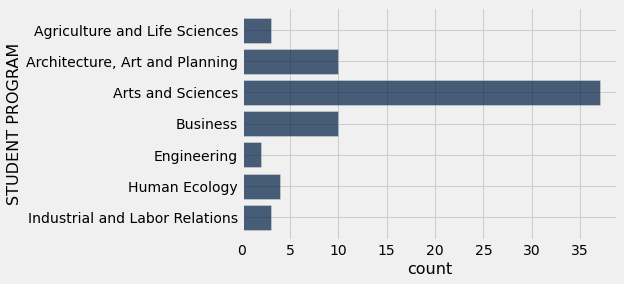

In [37]:
college.barh("STUDENT PROGRAM")